In [5]:
!pip install bs4

In [6]:
!pip install requests

In [7]:
!pip install pandas

In [8]:
from bs4 import BeautifulSoup
import requests
import pandas as pd

In [12]:
URL="https://www.amazon.com/s?k=playstation+5&crid=11O9IRX81OOQM&sprefix=play%2Caps%2C469&ref=nb_sb_ss_w_hit-vc-lth_playstation-5_k0_1_4"

In [11]:
HEADERS=({'User-Agent':'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/126.0.0.0 Safari/537.36','Accept-Language': 'en-US, en;q=0.5'})

HTTP Request

In [13]:
webpage= requests.get(URL,headers=HEADERS)

In [14]:
webpage

<Response [200]>

In [17]:
type(webpage.content)

bytes

In [19]:
#soup object containing all data
soup=BeautifulSoup(webpage.content,"html.parser")

In [20]:
soup

<!DOCTYPE html>
<html class="a-no-js" data-19ax5a9jf="dingo" lang="en-us"><!-- sp:feature:head-start -->
<head><script>var aPageStart = (new Date()).getTime();</script><meta charset="utf-8"/>
<!-- sp:end-feature:head-start -->
<!-- sp:feature:csm:head-open-part1 -->
<script type="text/javascript">var ue_t0=ue_t0||+new Date();</script>
<!-- sp:end-feature:csm:head-open-part1 -->
<!-- sp:feature:cs-optimization -->
<meta content="on" http-equiv="x-dns-prefetch-control"/>
<link href="https://images-na.ssl-images-amazon.com" rel="dns-prefetch"/>
<link href="https://m.media-amazon.com" rel="dns-prefetch"/>
<link href="https://completion.amazon.com" rel="dns-prefetch"/>
<!-- sp:end-feature:cs-optimization -->
<!-- sp:feature:csm:head-open-part2 -->
<script type="text/javascript">
window.ue_ihb = (window.ue_ihb || window.ueinit || 0) + 1;
if (window.ue_ihb === 1) {

var ue_csm = window,
    ue_hob = +new Date();
(function(d){var e=d.ue=d.ue||{},f=Date.now||function(){return+new Date};e.d=func

In [23]:
#fetch links as list of tag objects
links=soup.find_all("a",attrs={'class':'a-link-normal s-underline-text s-underline-link-text s-link-style a-text-normal'})

In [27]:
link=links[0].get('href')

In [28]:
product_list="https://amazon.com"+link

In [29]:
product_list

'https://amazon.com/PlayStation%C2%AE5-console-slim-PlayStation-5/dp/B0CL61F39H/ref=sr_1_1?crid=11O9IRX81OOQM&dib=eyJ2IjoiMSJ9.IBzp2a7hJYOBBKGDpX2BCAjIjGrN4dtfzoAawTrYYQpm95dzXQfXu3FE6jGfzkFyL6j6yN2DYKp0ho-MH4EJM3xvJlYCFAwC4X9_6l2NYB0Ya_PZ7_Z4qFAg8y9RgR4hwN2OjbJ6r2nP_R29XrXi62dSdwDFu30OUxmywtmfwtyBSrDb1obEAdUpFixaupT_aCByf9H1qUPAOndL9YoYGsK2ZhT89F26ZzNqbXszsj4.-bG3ZYUoIh19URY5UGv3udqwHSbrmcGJOx1nU8V3iQc&dib_tag=se&keywords=playstation+5&qid=1720092329&sprefix=play%2Caps%2C469&sr=8-1'

In [30]:
new_webpage= requests.get(product_list,headers=HEADERS)

In [31]:
new_webpage

<Response [200]>

In [32]:
#soup object containing all data
new_soup=BeautifulSoup(new_webpage.content,"html.parser")


<!DOCTYPE html>
<html class="a-no-js" data-19ax5a9jf="dingo" lang="en-us"><!-- sp:feature:head-start -->
<head><script>var aPageStart = (new Date()).getTime();</script><meta charset="utf-8"/>
<!-- sp:end-feature:head-start -->
<!-- sp:feature:csm:head-open-part1 -->
<script type="text/javascript">var ue_t0=ue_t0||+new Date();</script>
<!-- sp:end-feature:csm:head-open-part1 -->
<!-- sp:feature:cs-optimization -->
<meta content="on" http-equiv="x-dns-prefetch-control"/>
<link href="https://images-na.ssl-images-amazon.com" rel="dns-prefetch"/>
<link href="https://m.media-amazon.com" rel="dns-prefetch"/>
<link href="https://completion.amazon.com" rel="dns-prefetch"/>
<!-- sp:end-feature:cs-optimization -->
<!-- sp:feature:csm:head-open-part2 -->
<script type="text/javascript">
window.ue_ihb = (window.ue_ihb || window.ueinit || 0) + 1;
if (window.ue_ihb === 1) {

var ue_csm = window,
    ue_hob = +new Date();
(function(d){var e=d.ue=d.ue||{},f=Date.now||function(){return+new Date};e.d=func
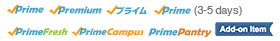

In [33]:
new_soup

In [37]:
new_soup.find("span",attrs={"id":'productTitle'}).text.strip()

'PlayStation®5 console (slim)'

In [41]:
new_soup.find("span",attrs={"class":'a-price a-text-price a-size-medium apexPriceToPay'})

<span class="a-price a-text-price a-size-medium apexPriceToPay" data-a-color="price" data-a-size="b"><span class="a-offscreen">$475.19</span><span aria-hidden="true">$475.19</span></span>

In [42]:
new_soup.find("span",attrs={"class":'a-price a-text-price a-size-medium apexPriceToPay'}).find("span",attrs={"class": "a-offscreen"})

<span class="a-offscreen">$475.19</span>

In [43]:
new_soup.find("span",attrs={"class":'a-price a-text-price a-size-medium apexPriceToPay'}).find("span",attrs={"class": "a-offscreen"}).text

'$475.19'

In [44]:
new_soup.find("span",attrs={"class":'a-icon-alt'}).text.strip()

'4.7 out of 5 stars'



Complete project

In [51]:
# Function to extract Product Title
def get_title(soup):

    try:
        # Outer Tag Object
        title = soup.find("span", attrs={"id":'productTitle'})
        
        # Inner NavigatableString Object
        title_value = title.text

        # Title as a string value
        title_string = title_value.strip()

    except AttributeError:
        title_string = ""

    return title_string

# Function to extract Product Price
def get_price(soup):

    try:
        price = soup.find("span", attrs={'id':'priceblock_ourprice'}).string.strip()

    except AttributeError:

        try:
            # If there is some deal price
            price = soup.find("span", attrs={'id':'priceblock_dealprice'}).string.strip()

        except:
            price = ""

    return price

# Function to extract Product Rating
def get_rating(soup):

    try:
        rating = soup.find("i", attrs={'class':'a-icon a-icon-star a-star-4-5'}).string.strip()
    
    except AttributeError:
        try:
            rating = soup.find("span", attrs={'class':'a-icon-alt'}).string.strip()
        except:
            rating = ""	

    return rating

# Function to extract Number of User Reviews
def get_review_count(soup):
    try:
        review_count = soup.find("span", attrs={'id':'acrCustomerReviewText'}).string.strip()

    except AttributeError:
        review_count = ""	

    return review_count

# Function to extract Availability Status
def get_availability(soup):
    try:
        available = soup.find("div", attrs={'id':'availability'})
        available = available.find("span").string.strip()

    except AttributeError:
        available = "Not Available"	

    return available

In [52]:
from bs4 import BeautifulSoup
import requests
import pandas as pd
import numpy as np

In [53]:
if __name__ == '__main__':

    # add your user agent 
    HEADERS = ({'User-Agent':'', 'Accept-Language': 'en-US, en;q=0.5'})

    # The webpage URL
    URL = "https://www.amazon.com/s?k=playstation+4&ref=nb_sb_noss_2"

    # HTTP Request
    webpage = requests.get(URL, headers=HEADERS)

    # Soup Object containing all data
    soup = BeautifulSoup(webpage.content, "html.parser")

    # Fetch links as List of Tag Objects
    links = soup.find_all("a", attrs={'class':'a-link-normal s-no-outline'})

    # Store the links
    links_list = []

    # Loop for extracting links from Tag Objects
    for link in links:
            links_list.append(link.get('href'))

    d = {"title":[], "price":[], "rating":[], "reviews":[],"availability":[]}
    
    # Loop for extracting product details from each link 
    for link in links_list:
        new_webpage = requests.get("https://www.amazon.com" + link, headers=HEADERS)

        new_soup = BeautifulSoup(new_webpage.content, "html.parser")

        # Function calls to display all necessary product information
        d['title'].append(get_title(new_soup))
        d['price'].append(get_price(new_soup))
        d['rating'].append(get_rating(new_soup))
        d['reviews'].append(get_review_count(new_soup))
        d['availability'].append(get_availability(new_soup))

    
    amazon_df = pd.DataFrame.from_dict(d)
    amazon_df['title'].replace('', np.nan, inplace=True)
    amazon_df = amazon_df.dropna(subset=['title'])
    amazon_df.to_csv("amazon_data.csv", header=True, index=False)

In [54]:
amazon_df

,title,price,rating,reviews,availability
0,PlayStation®4 Console – Call of Duty® Modern W...,,4.5 out of 5 stars,84 ratings,In Stock
1,Wireless Controller Dual Vibration Game Joysti...,,4.0 out of 5 stars,"1,955 ratings",In Stock
2,"FASIGO PS4 Controller 2 Pack, Wireless PS4 Con...",,4.2 out of 5 stars,32 ratings,In Stock
3,Grand Theft Auto V: Premium Edition (PS4),,4.6 out of 5 stars,"12,148 ratings",Only 3 left in stock - order soon.
4,PS4 Media Remote Control for Playstation 4 Con...,,3.9 out of 5 stars,71 ratings,In Stock
5,Wireless Controller for PS4 with 2 Thumb Grips...,,4.2 out of 5 stars,"2,468 ratings",In Stock
6,PS4 Controller Charger Dock Station with Charg...,,4.7 out of 5 stars,"3,142 ratings",In Stock
7,DualShock 4 Wireless Controller for PlayStatio...,,4.6 out of 5 stars,"168,089 ratings",
8,"PS4 Controller Charger Dock Station, OIVO 1.8H...",,4.7 out of 5 stars,"38,472 ratings",In Stock
9,WWE 2K24 - PlayStation 4,,4.8 out of 5 stars,142 ratings,In Stock
